### Customer Rentation :

Data Scientists have to apply their analytical skills to give findings and conclusions in detailed data analysis written in jupyter notebook . Only data analysis is required.


In [1]:
# importing required lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Classification libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Performance check
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
pd.set_option("display.max_columns",None)
dataset = pd.read_excel("Datasets/customer_retention_dataset_raw.xlsx")
dataset.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [3]:
# Checking the column having what are feature
print("Feature Names :\n",dataset.columns)

Feature Names :
 Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After 

In [4]:
len(dataset.columns) # Totally we have 71 columns

71

### Observation :

- In the above dataset is having more feature so we need to understand which one relevant.

- The column name is lengthy so we can rename that for our understand.

- We are not seeing any target variable and as per the problem statment we need to analyse and find the insights from this data.

- In the end of data analse we will decide we need to model or not.

In [5]:
dataset.shape

(269, 71)

In [6]:
# Checking types of dataset we have
pd.set_option('display.max_rows',None)

DataType = pd.DataFrame({'Feature':dataset.columns,'DataType':dataset.dtypes})
DataType.set_index('Feature',inplace=True)
DataType

,DataType
Feature,
1Gender of respondent,object
2 How old are you?,object
3 Which city do you shop online from?,object
4 What is the Pin Code of where you shop online from?,int64
5 Since How Long You are Shopping Online ?,object
6 How many times you have made an online purchase in the past 1 year?,object
7 How do you access the internet while shopping on-line?,object
8 Which device do you use to access the online shopping?,object
9 What is the screen size of your mobile device?\t\t\t\t\t\t,object


<AxesSubplot:xlabel='DataType'>

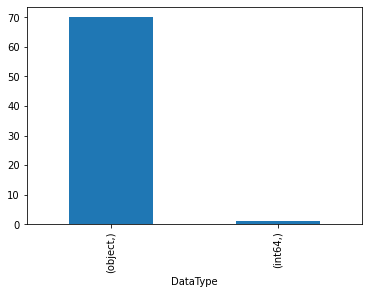

In [7]:
DataType.value_counts().plot(kind='bar')

##### All value almost Object only but pincode is in integer as we know ML model only understand numerical value so we need to use some encoder to convert the string value to numerical form.

### Checking Null value present in the dataset

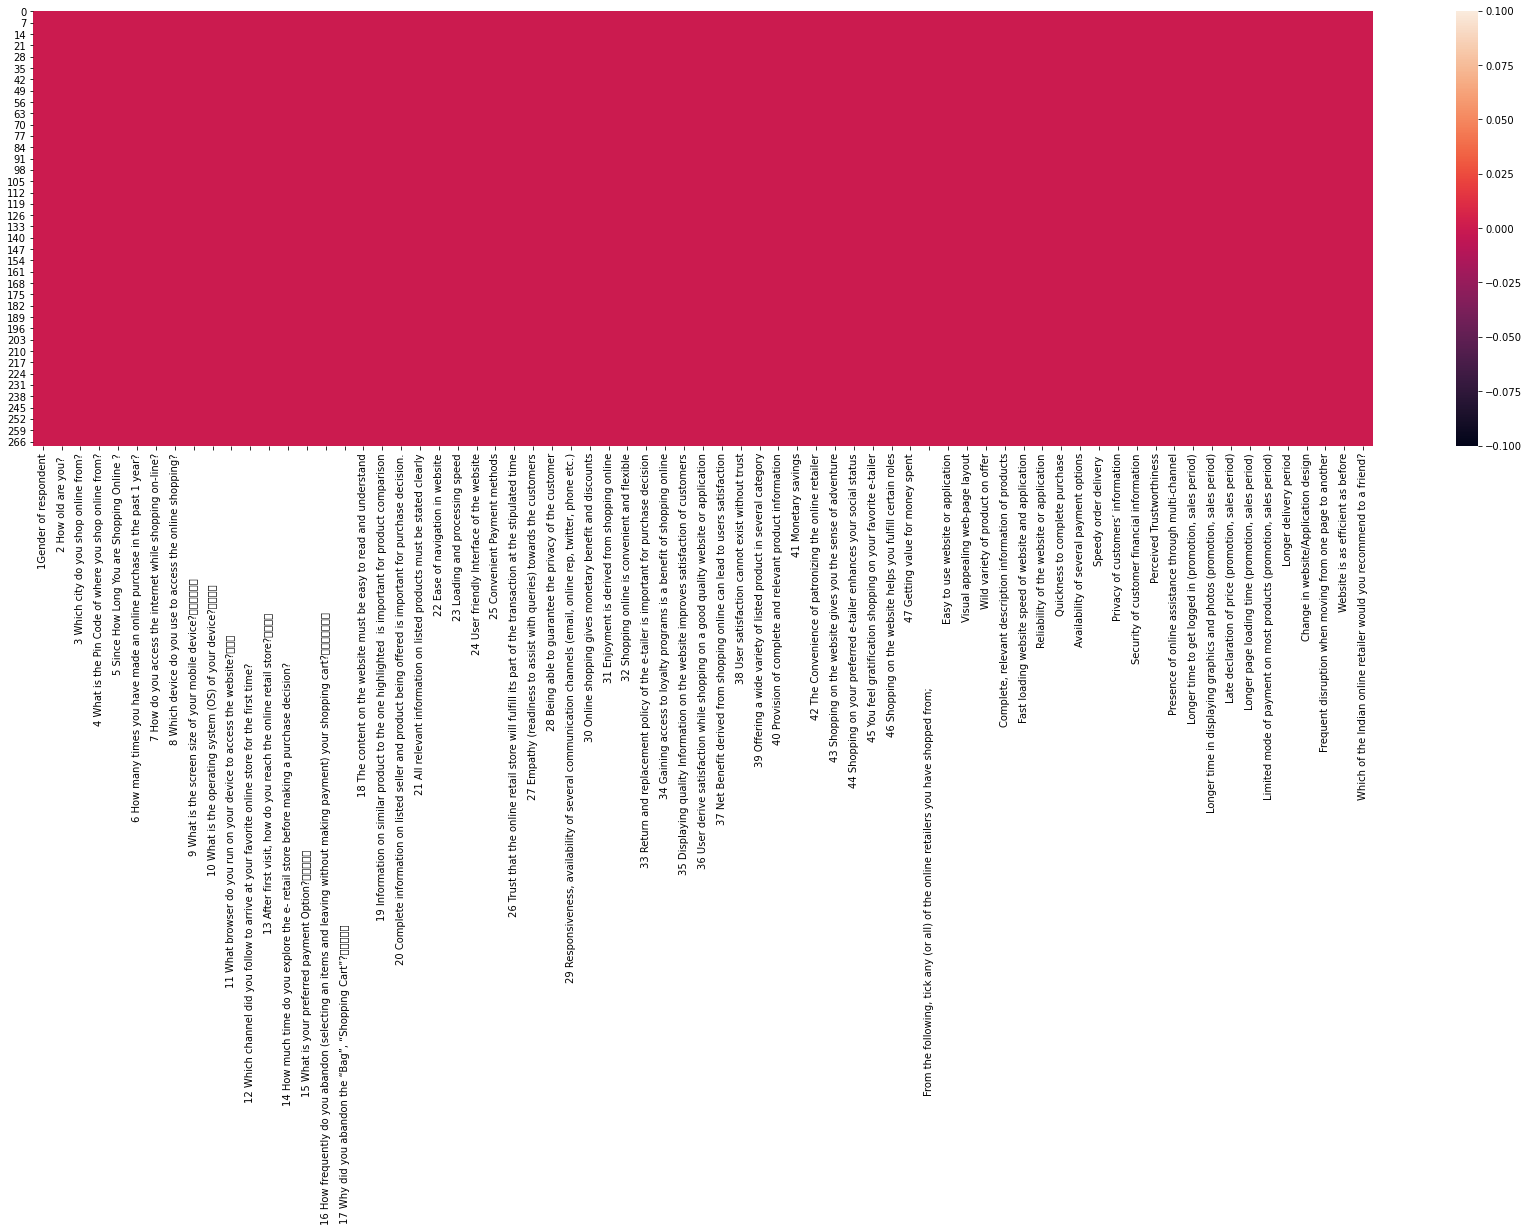

In [8]:
plt.figure(figsize=(30,8))
# x = dataset.isnull().iloc[0,:]
ax = sns.heatmap(dataset.isnull())
#ax.set()
ax.set_xticklabels(ax.get_xmajorticklabels(),fontsize = 10)
plt.show()

**If null value is present in the data mean color will be differ in the each column So we are not seeing any changes in heatmap color so their is not null value in the dataset**

In [9]:
# We want see what are the unique category is present in the data so that i can clean accordingly

data =dataset.copy() # taking copy of original dataset
cat_data = [feature for feature in data.columns if data[feature].dtype == 'O']

#creating dataframe
Unique_feature = {}
Unique_feature['Feature'] = []
Unique_feature['length']=[]
Unique_feature['category']=[]

for i in cat_data:
    Unique_feature['Feature'].append(i)
    Unique_feature['length'].append(len(data[i].unique()))
    Unique_feature['category'].append(data[i].unique())

unique_cat = pd.DataFrame(Unique_feature)
unique_cat

,Feature,length,category
0,1Gender of respondent,2,"[Male, Female]"
1,2 How old are you?,5,"[31-40 years, 21-30 years, 41-50 yaers, Less t..."
2,3 Which city do you shop online from?,11,"[Delhi, Greater Noida, Karnal , Bangalore , No..."
3,5 Since How Long You are Shopping Online ?,5,"[Above 4 years, 3-4 years, 2-3 years, Less tha..."
4,6 How many times you have made an online purch...,6,"[31-40 times, 41 times and above, Less than 10..."
5,7 How do you access the internet while shoppin...,4,"[Dial-up, Wi-Fi, Mobile Internet, Mobile inter..."
6,8 Which device do you use to access the online...,4,"[Desktop, Smartphone, Tablet, Laptop]"
7,9 What is the screen size of your mobile devic...,4,"[Others, 4.7 inches, 5.5 inches, 5 inches]"
8,10 What is the operating system (OS) of your d...,3,"[Window/windows Mobile, IOS/Mac, Android]"
9,11 What browser do you run on your device to a...,4,"[Google chrome, Safari, Opera, Mozilla Firefox]"


<AxesSubplot:ylabel='length'>

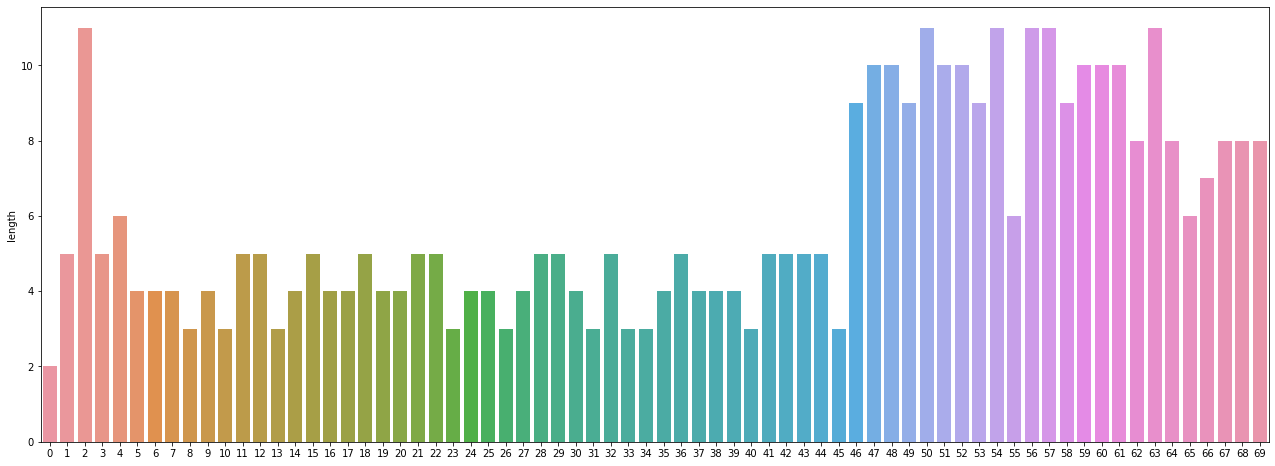

In [10]:
#ploting barchart to understand which column is having more categorical value 
plt.figure(figsize=(22,8))
sns.barplot(x=unique_cat.Feature.index,y=unique_cat.length)

<AxesSubplot:>

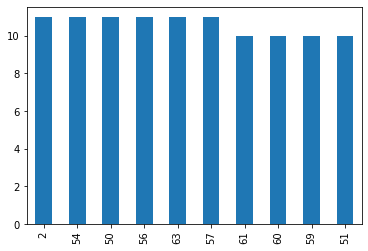

In [11]:
unique_cat.length.sort_values(ascending=False)[:10].plot.bar()
# we are just checking top 10 highest categorical value to understand the data

In [12]:
# Dealing each column and removing unnessary data from that dataframe

unique_cat.iloc[1,2]

array(['31-40 years', '21-30 years', '41-50 yaers', 'Less than 20 years',
       '51 years and above'], dtype=object)

In [13]:
def age_scale(col):
    if col == ('Less than 20 years' or '21-30 years'):
        return "Young Age Adult"
    elif col == '21-30 years':
        return "Young Age Adult"
    elif col == ('31-40 years' or '41-50 yaers'):
        return "Middle Age Adult"
    elif col == ('51 years and above'):
        return "Old Age Adults"
    else:
        return None

In [14]:
data['2 How old are you? '].unique()

array(['31-40 years', '21-30 years', '41-50 yaers', 'Less than 20 years',
       '51 years and above'], dtype=object)

In [15]:
"41-50 yaers" == ('31-40 years' or "41-50 yaers")

False

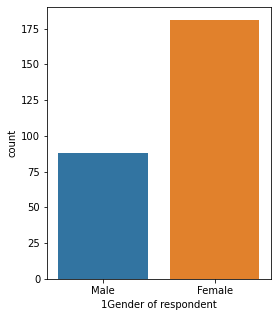

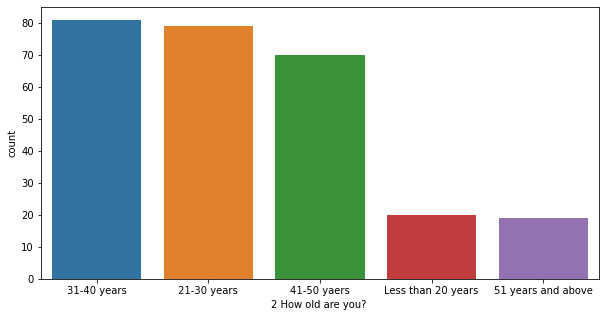

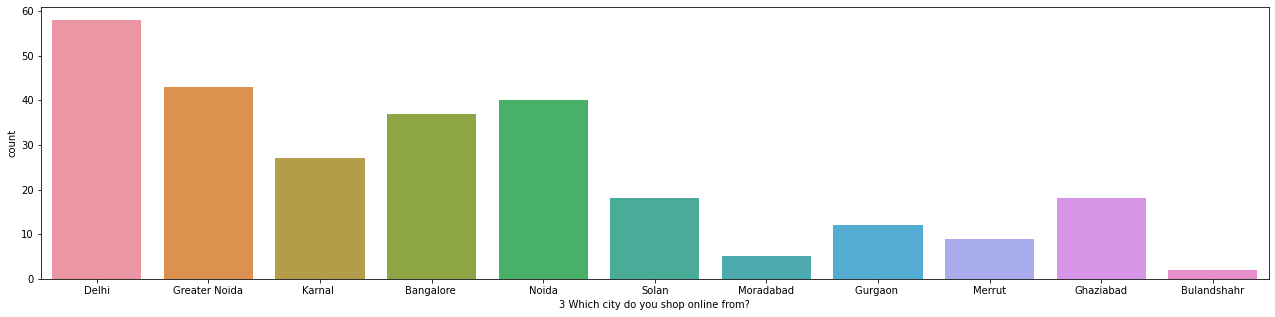

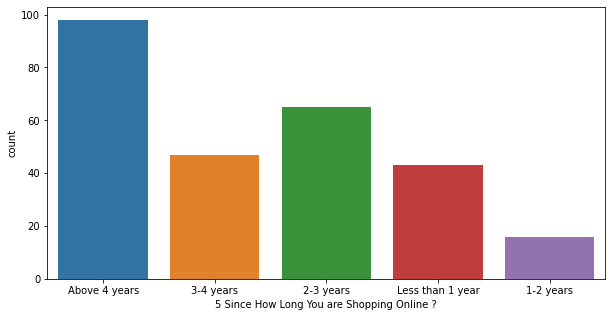

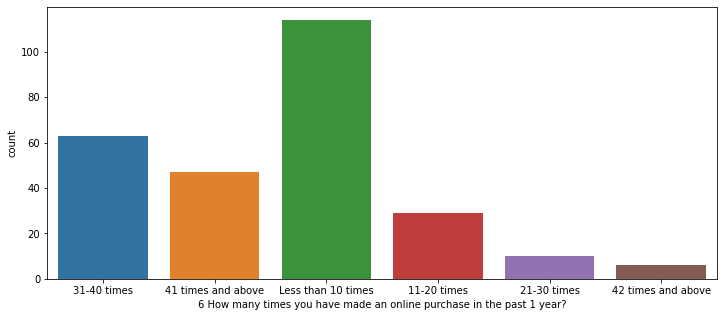

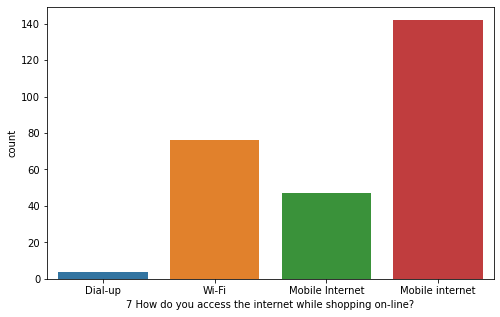

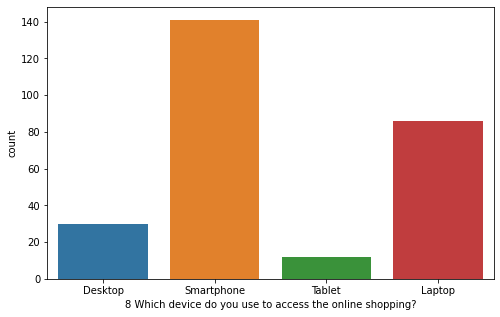

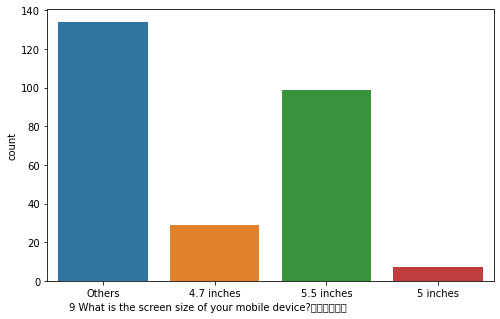

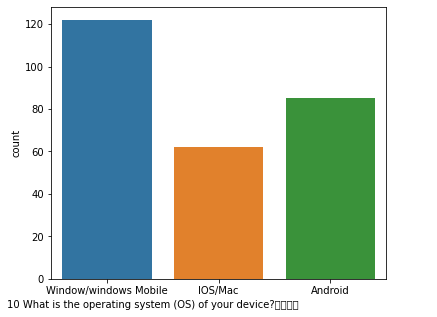

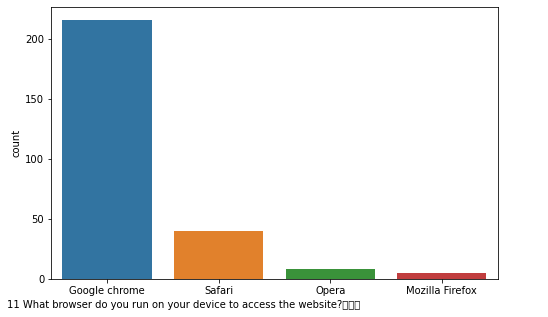

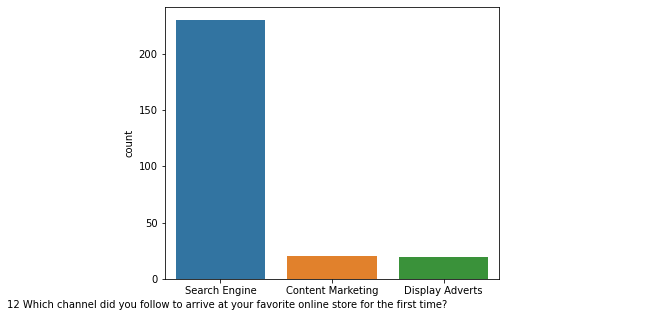

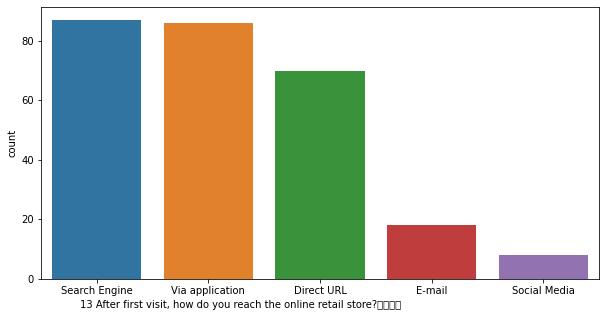

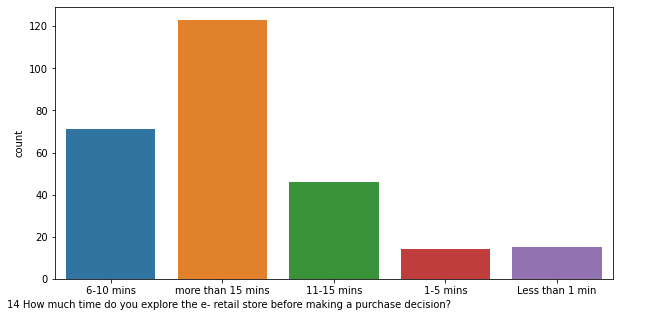

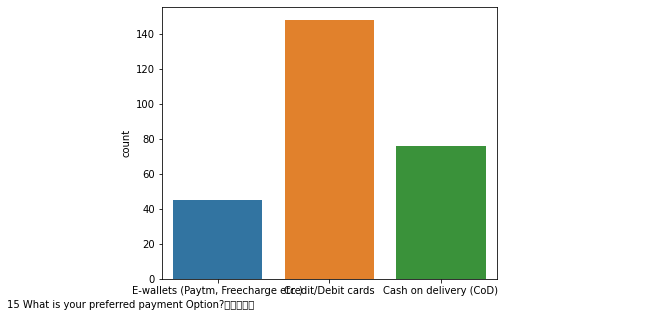

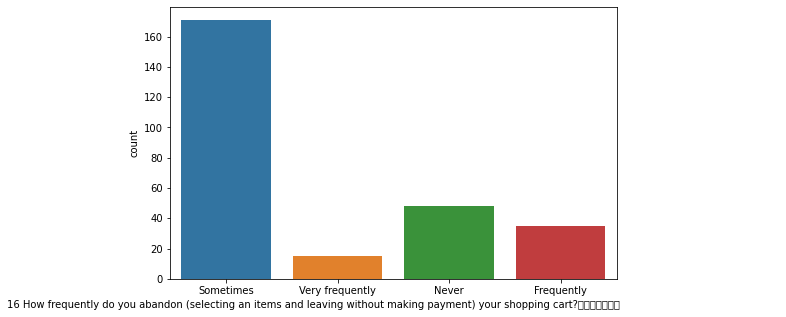

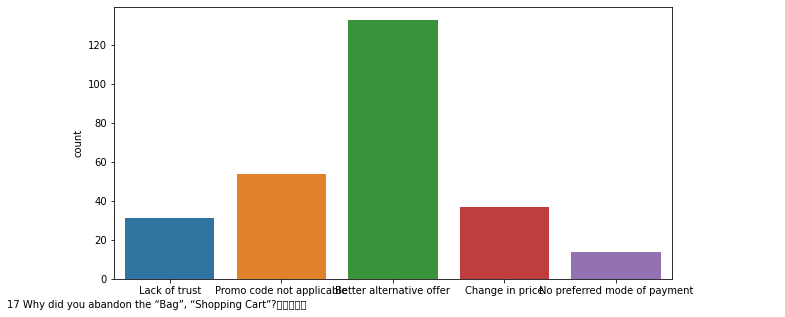

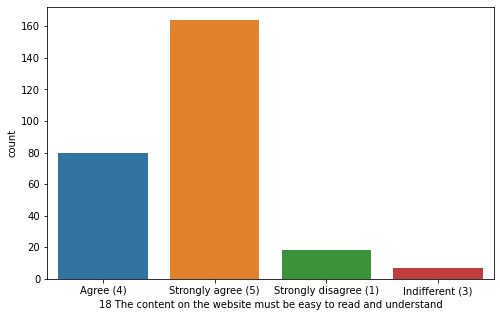

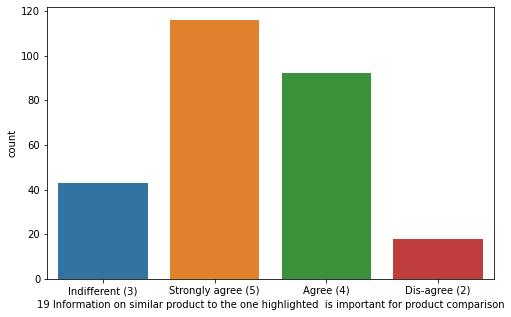

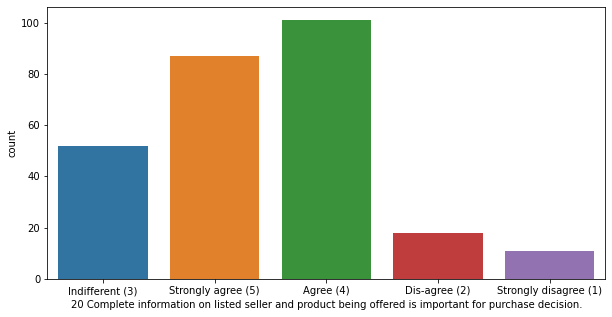

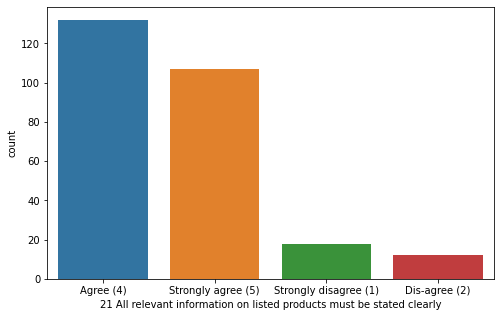

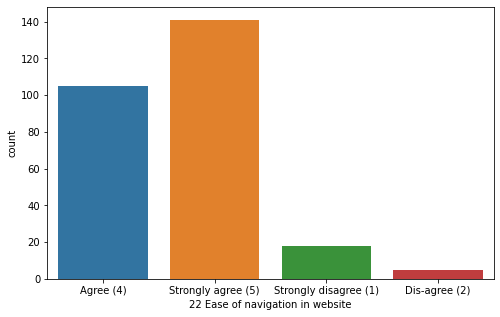

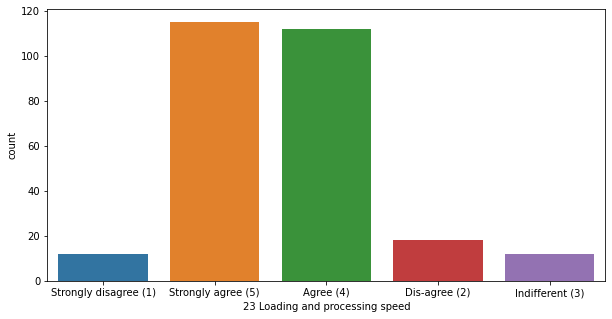

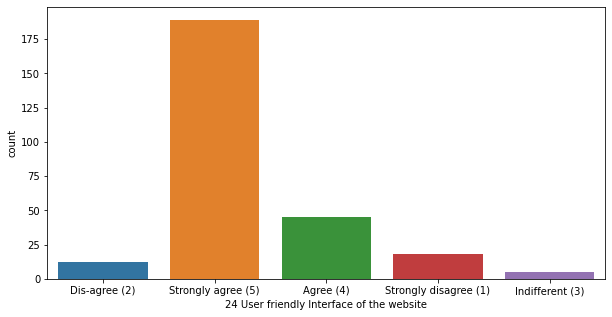

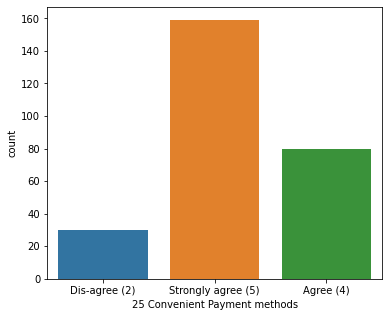

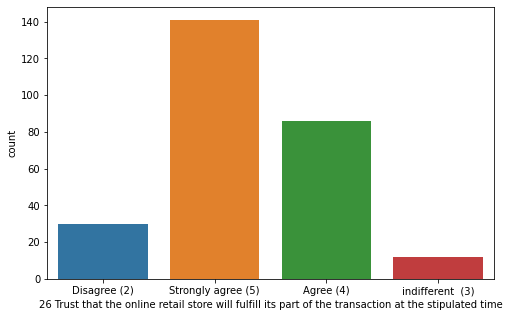

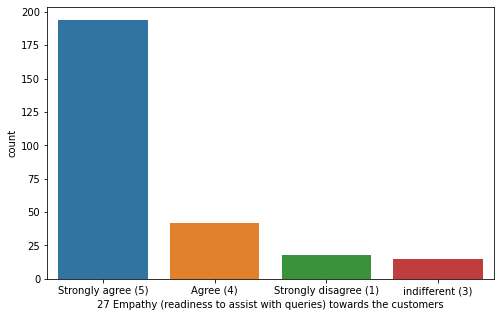

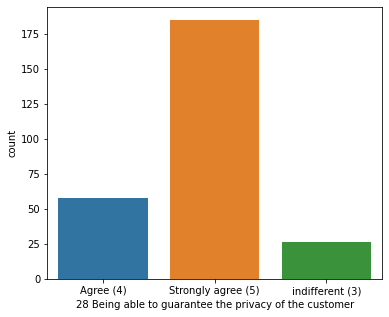

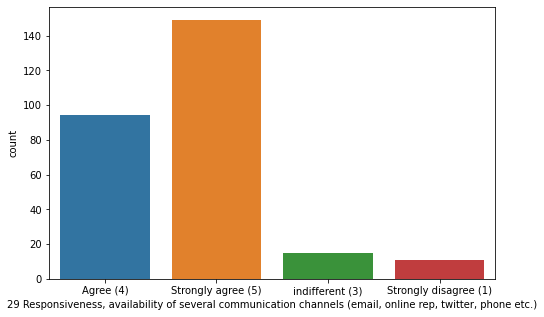

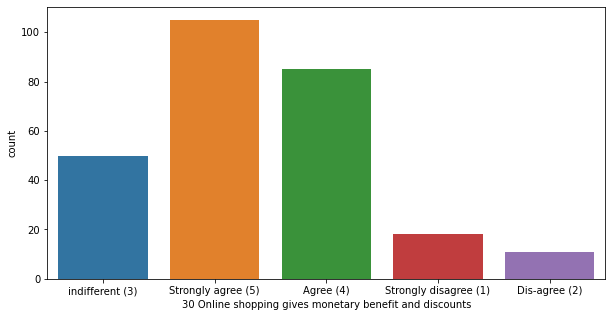

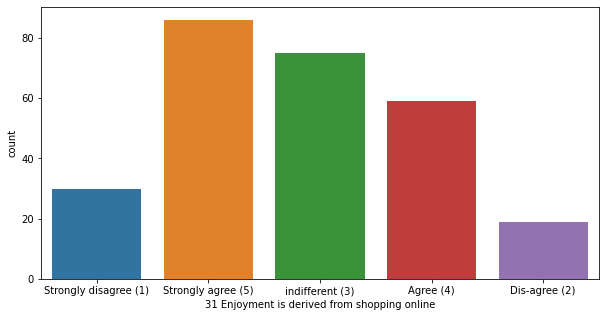

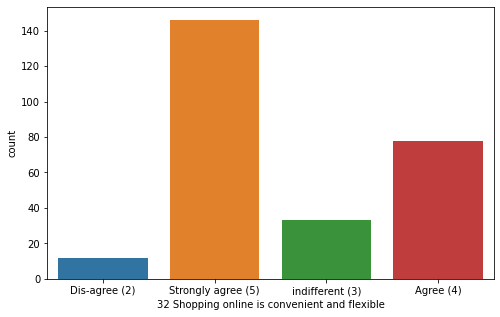

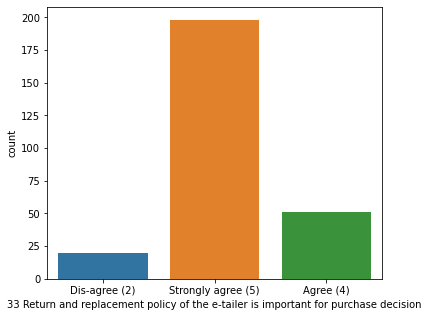

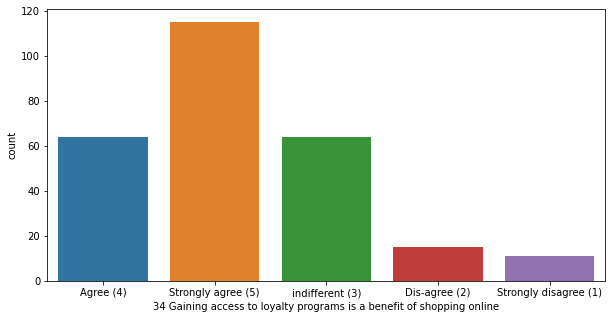

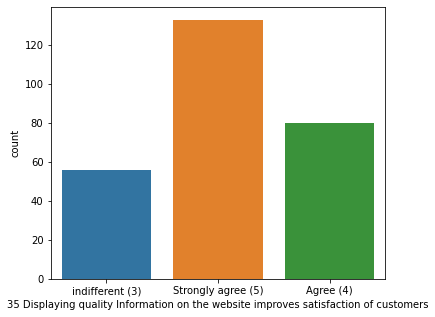

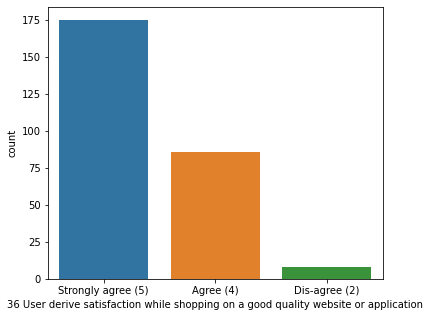

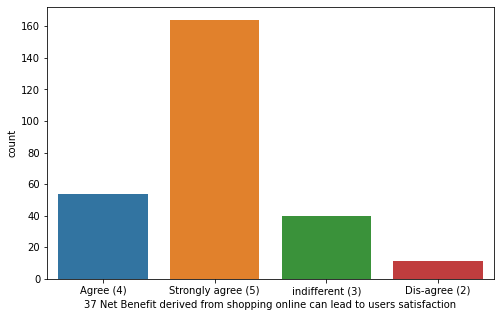

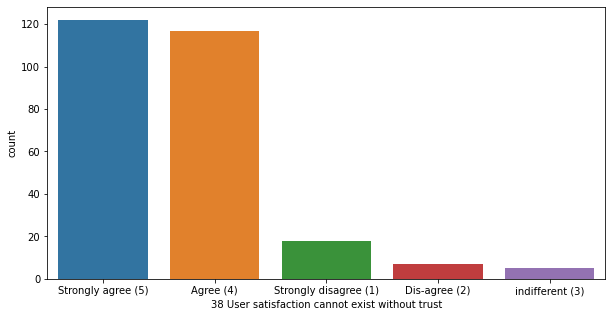

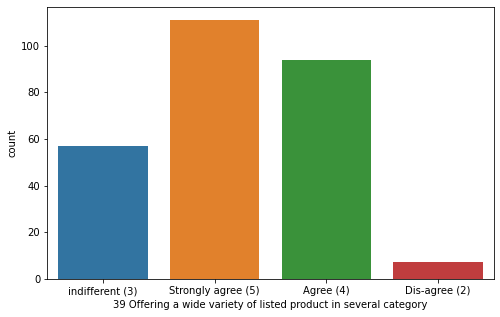

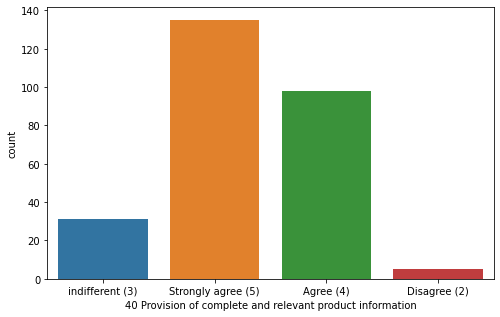

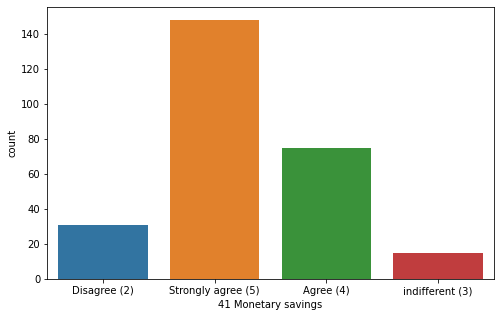

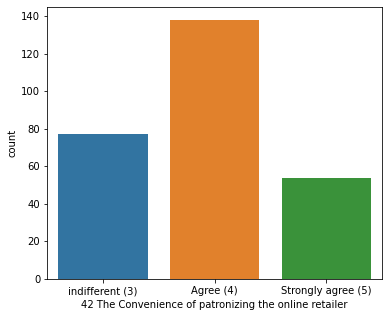

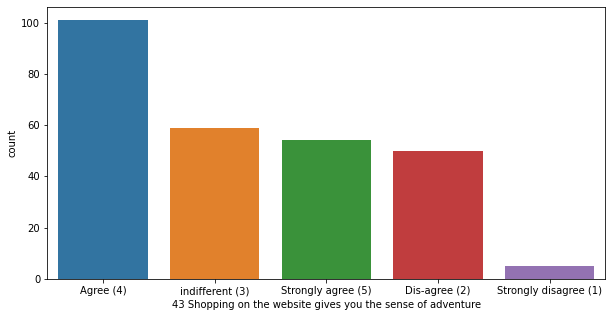

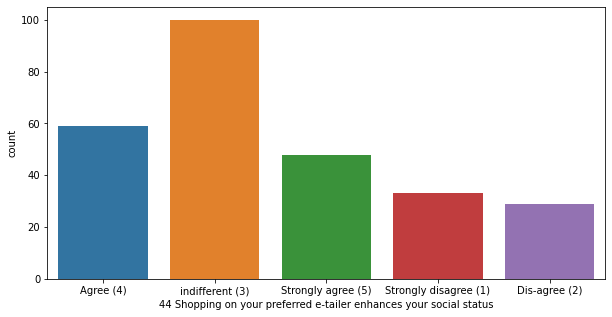

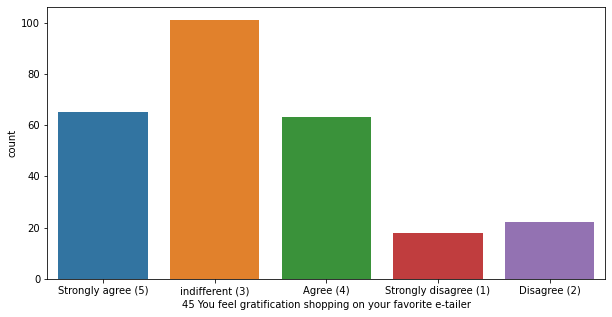

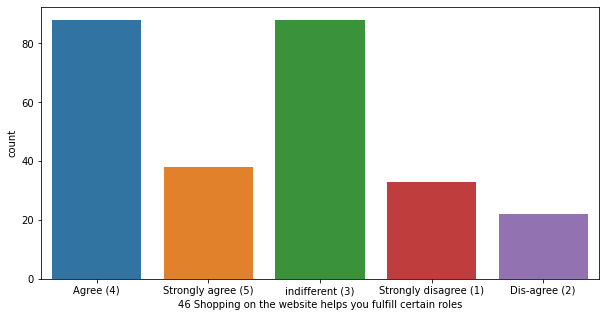

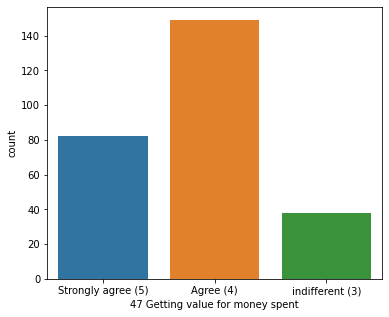

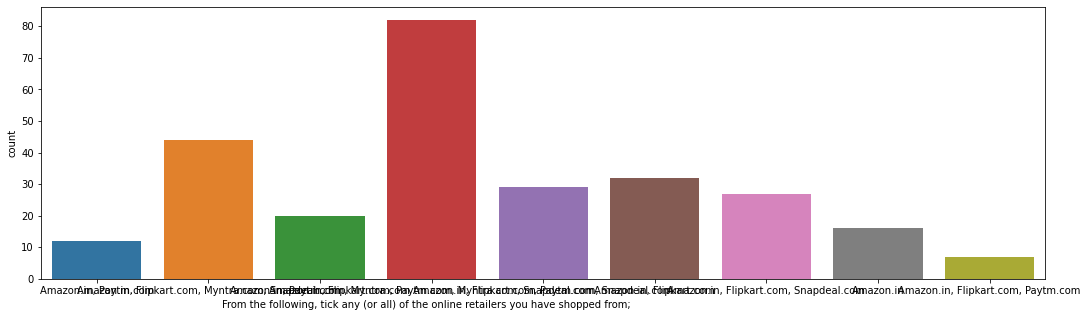

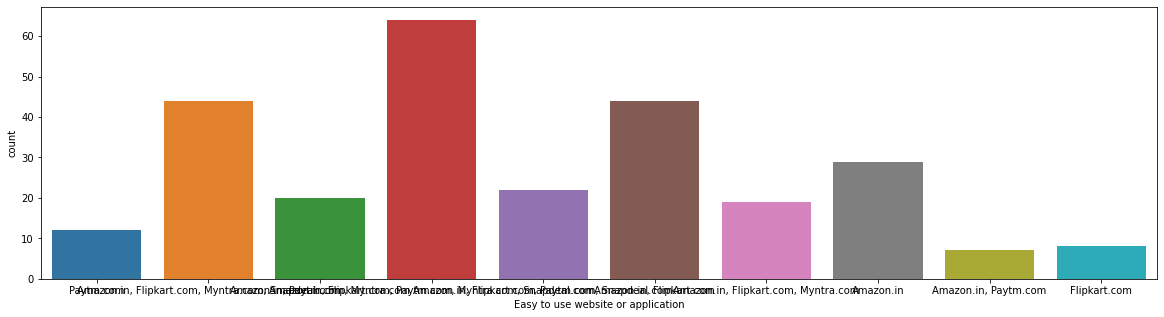

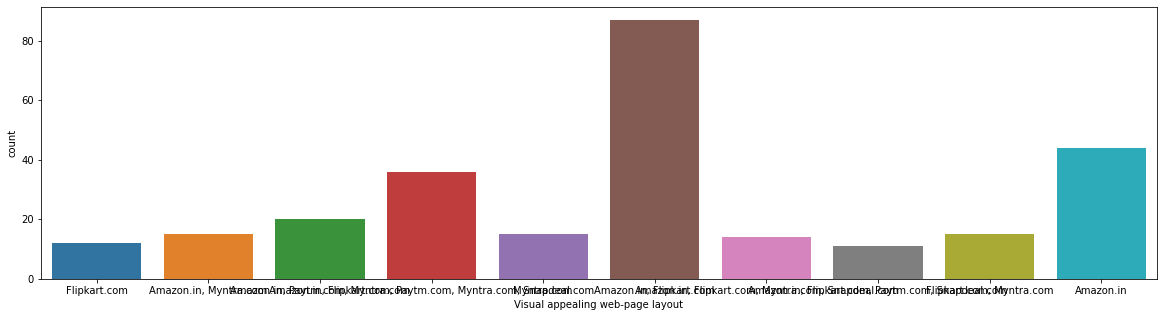

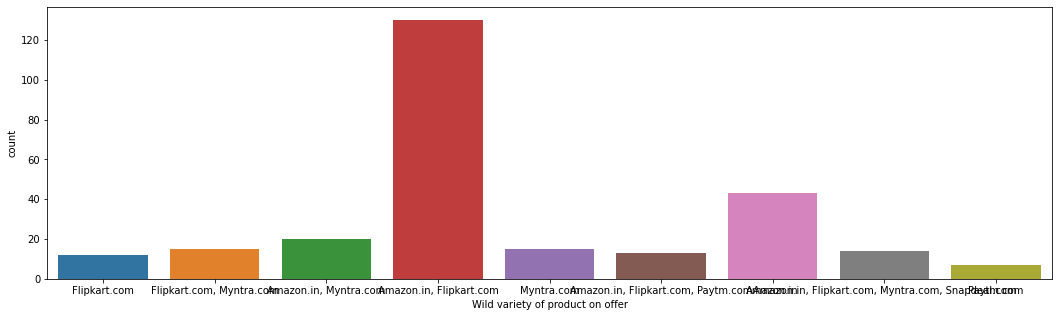

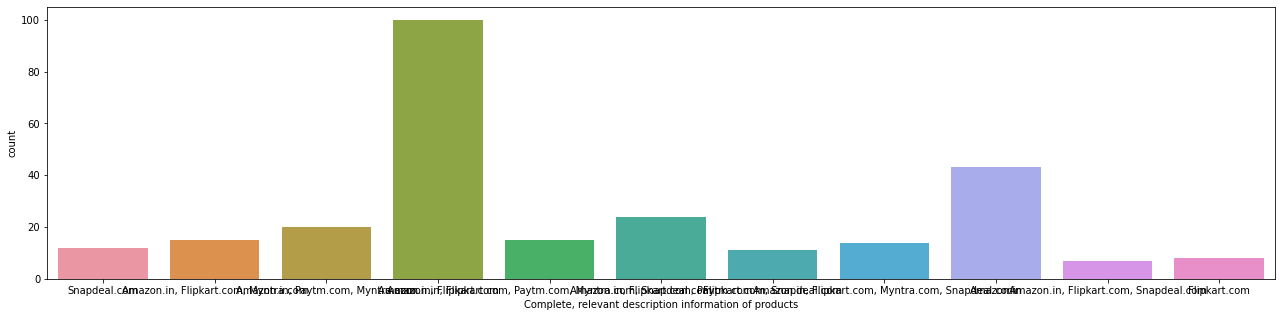

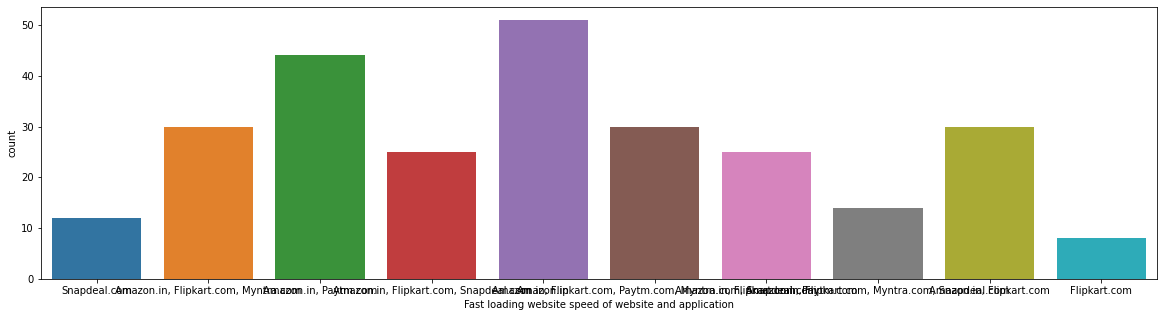

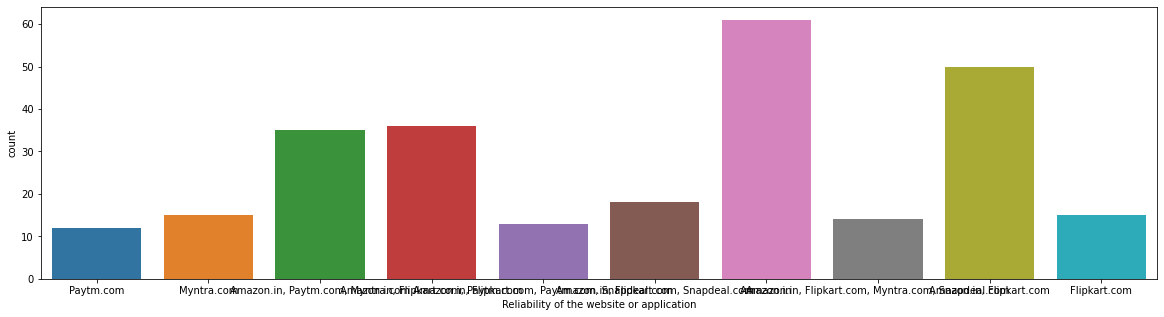

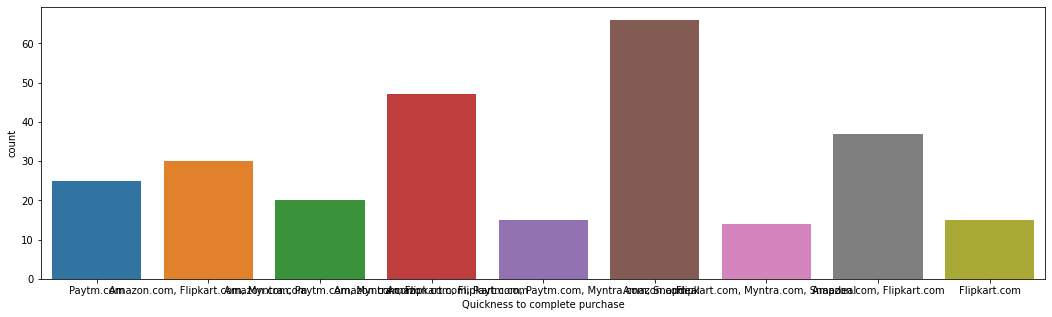

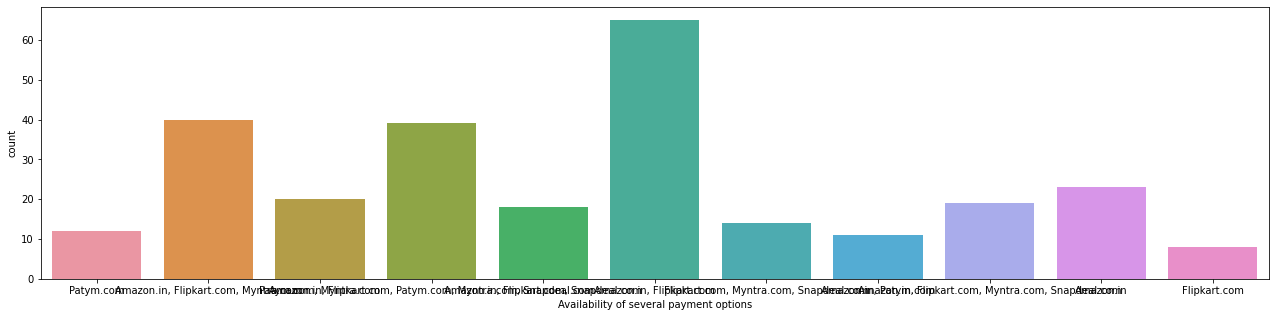

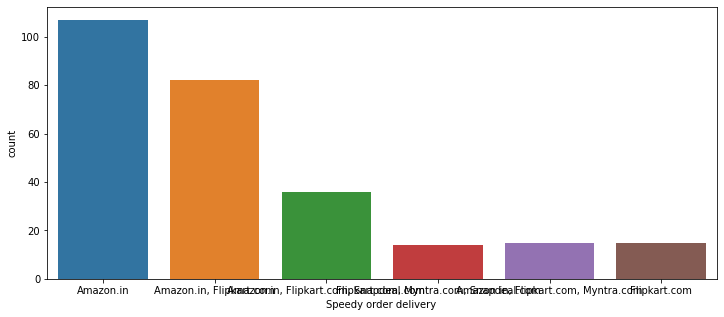

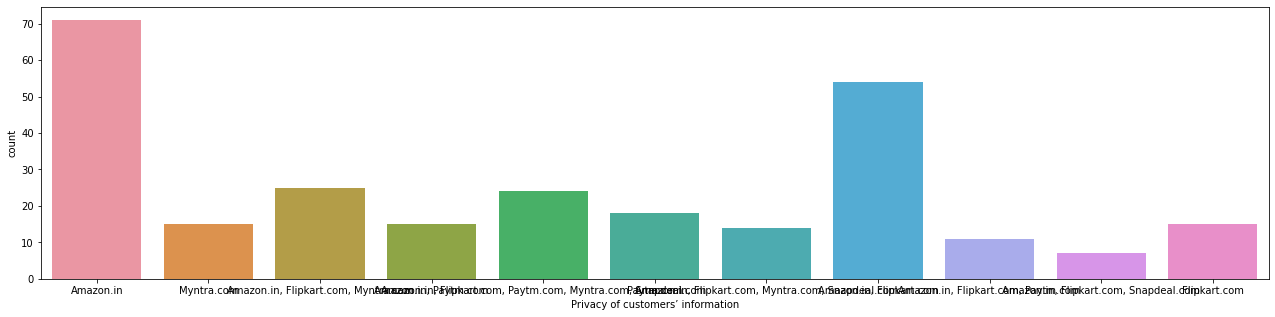

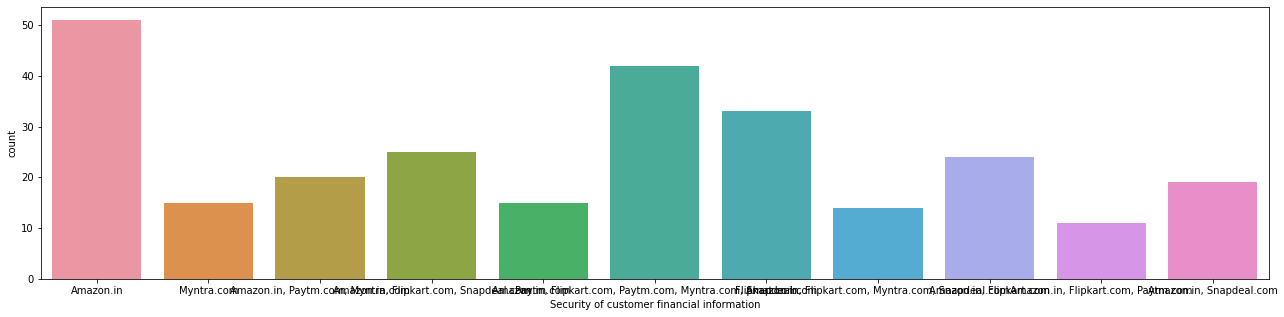

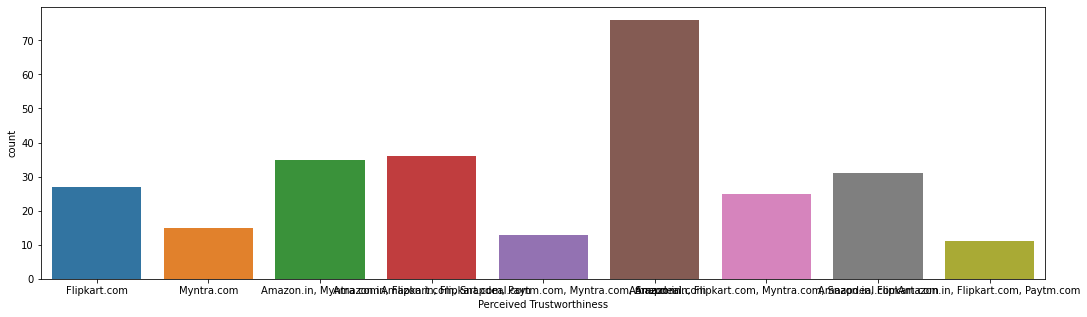

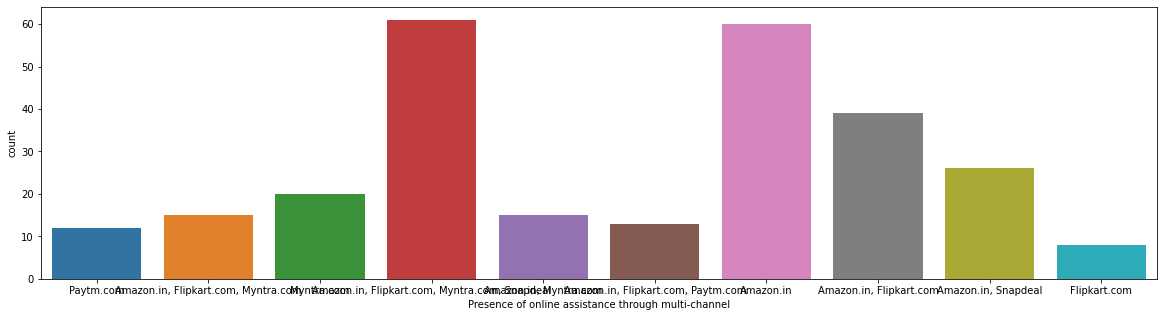

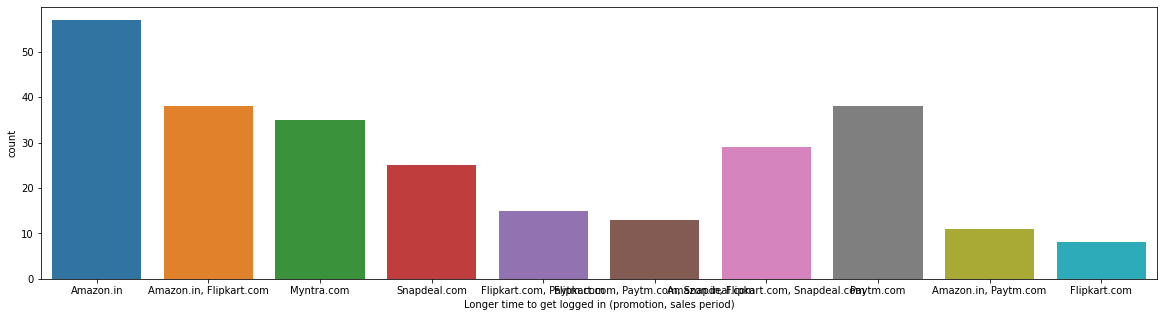

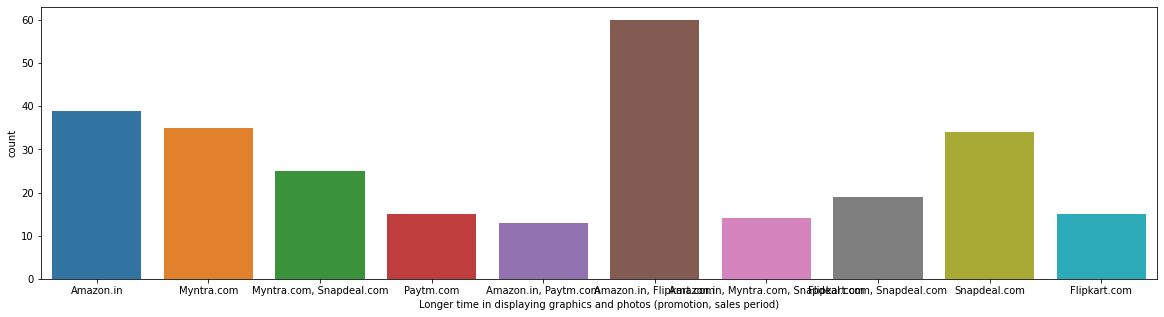

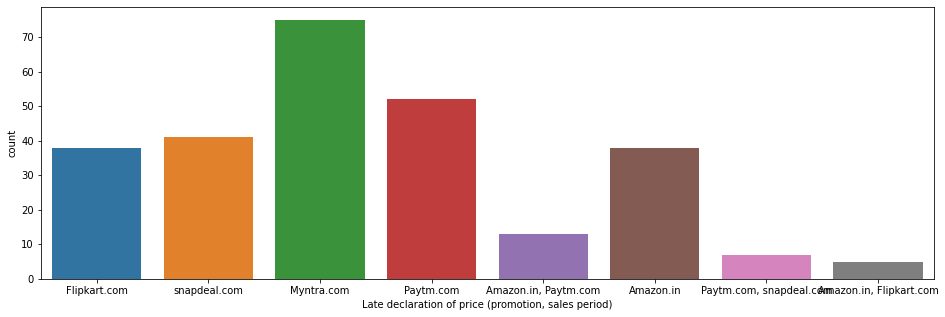

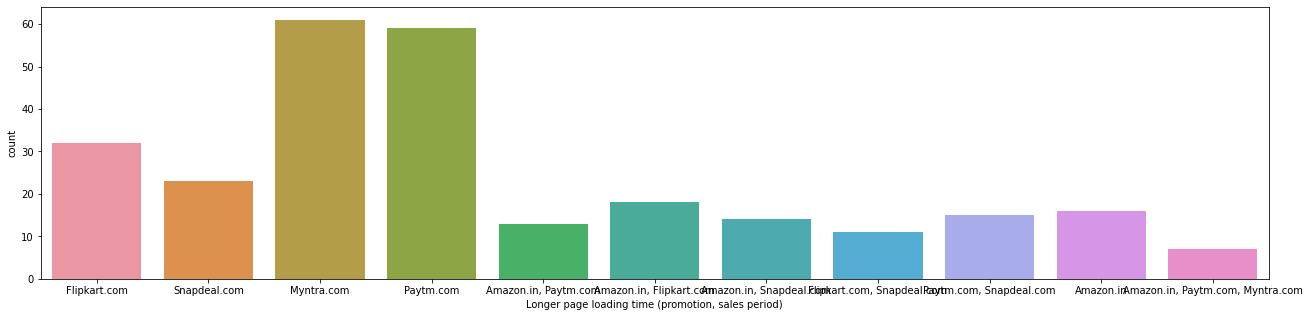

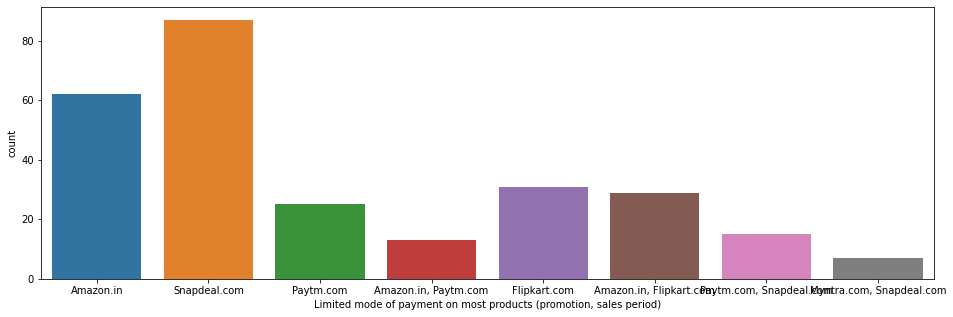

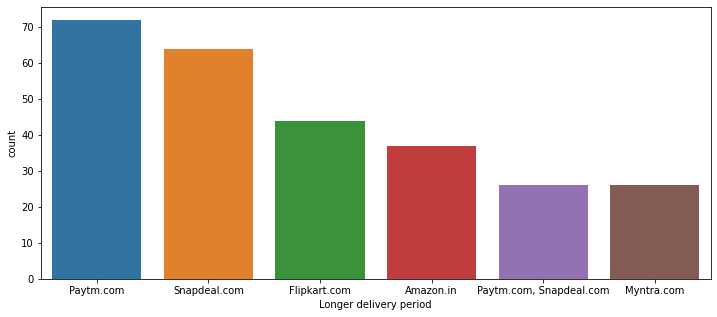

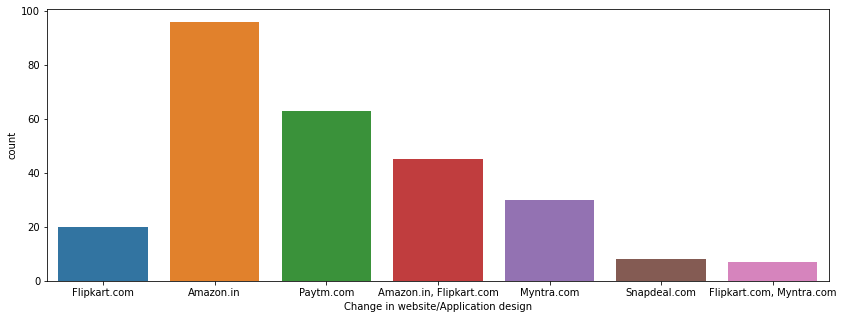

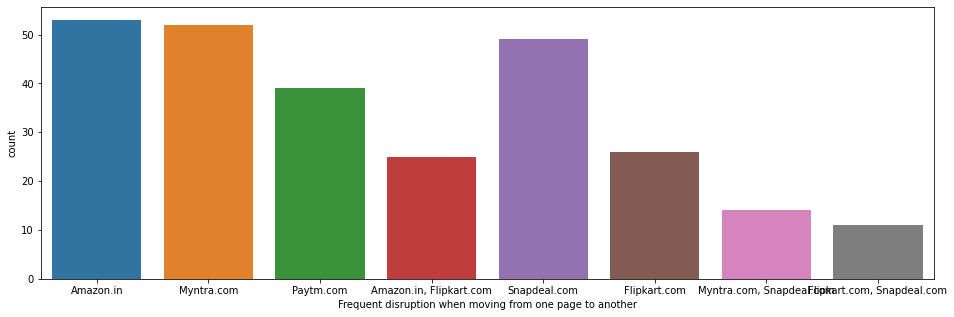

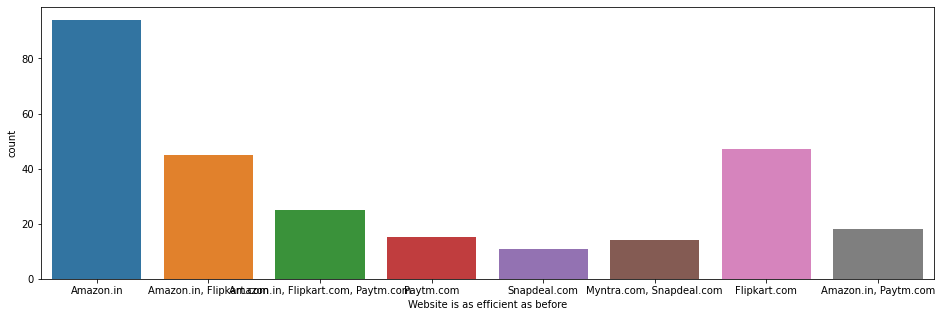

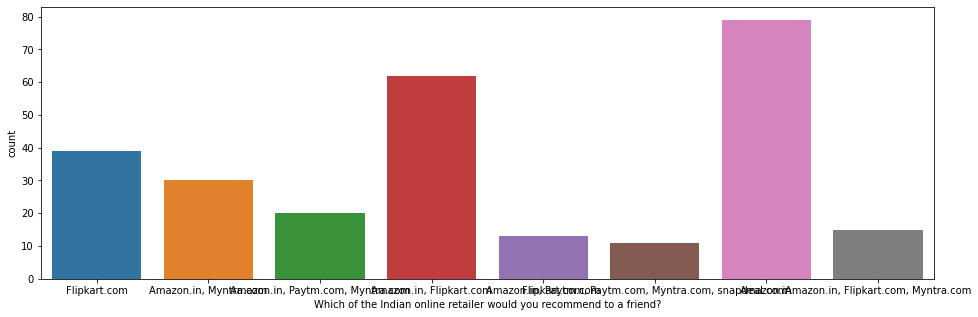

In [16]:
# Who is purchasing more in ecommerce

for i in cat_data:
    l = len(data[i].unique()) * 2
    plt.figure(figsize=(l,5))
    sns.countplot(data[i])

### Need to handle dataset

1. Access internet Mobile Internet is repeated one we need merge.

<AxesSubplot:xlabel='7 How do you access the internet while shopping on-line?', ylabel='count'>

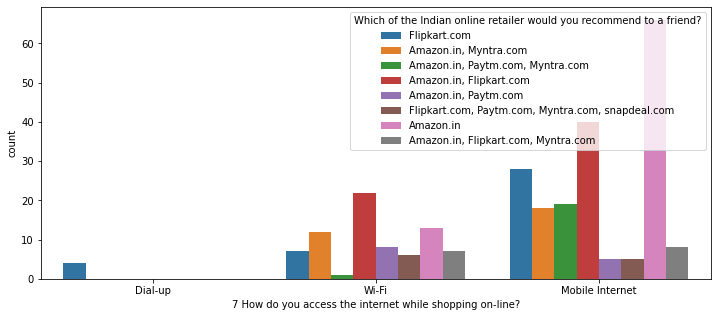

In [47]:
plt.figure(figsize=(12,5))
data['7 How do you access the internet while shopping on-line?'] = data['7 How do you access the internet while shopping on-line?'].str.replace("Mobile internet","Mobile Internet")
sns.countplot(data['7 How do you access the internet while shopping on-line?'],hue=data['Which of the Indian online retailer would you recommend to a friend?'])

<AxesSubplot:xlabel='17 Why did you abandon the “Bag”, “Shopping Cart”?', ylabel='count'>

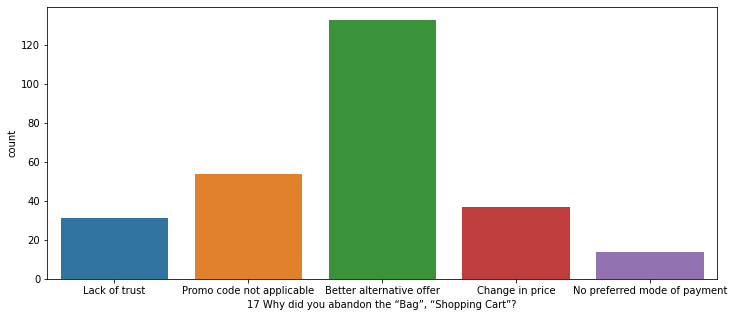

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(data['17 Why did you abandon the “Bag”, “Shopping Cart”?'])

<AxesSubplot:xlabel='14 How much time do you explore the e- retail store before making a purchase decision?', ylabel='count'>

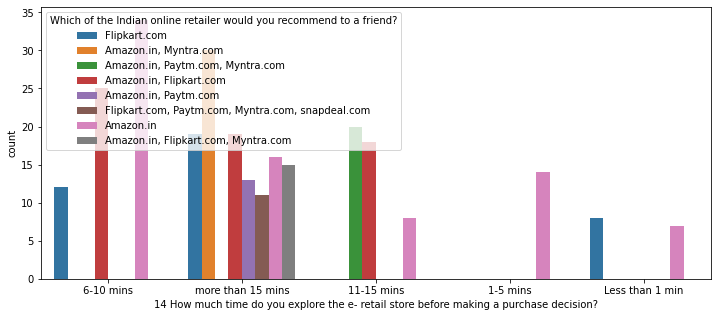

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(data=data,x='14 How much time do you explore the e- retail store before making a purchase decision?',
             hue=data['Which of the Indian online retailer would you recommend to a friend?'])

In [27]:
data.columns

Index(['1Gender of respondent', '2 How old are you?',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?',
       '10 What is the operating system (OS) of your device?',
       '11 What browser do you run on your device to access the website?',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?',
       '13 After first visit, how do you reach the online retail store?',
       '14 How much time do you explore the e- retail store before making a purchase decision?',
       '15 What is your preferred payment Option?',
       '16 How frequently do you abandon (sel

In [17]:
data['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               '].unique()

array(['E-wallets (Paytm, Freecharge etc.)', 'Credit/Debit cards',
       'Cash on delivery (CoD)'], dtype=object)

In [18]:
data.columns = data.columns.str.replace("\\t","").str.strip()

In [19]:
data.tail()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"17 Why did you abandon the “Bag”, “Shopping Cart”?",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
264,Female,21-30 years,Solan,173212

In [20]:
data['2 How old are you?'].unique()

array(['31-40 years', '21-30 years', '41-50 yaers', 'Less than 20 years',
       '51 years and above'], dtype=object)

In [21]:
def renameColumn(col): 
    if col == 'Less than 20 years':
        return '< 20 years'
    elif col == '21-30 years':
        return '21-30 years'
    elif col == '31-40 years':
        return '31-40 years'
    elif col == '41-50 yaers':
        return '41-50 years'
    elif '51 years and above':
        return '51 > years'
    else:
        return '0'

In [22]:
datacopy =  data.copy()

data['2 How old are you?'] = datacopy['2 How old are you?'].apply(renameColumn)

<AxesSubplot:xlabel='1Gender of respondent,2 How old are you?'>

<Figure size 432x288 with 0 Axes>

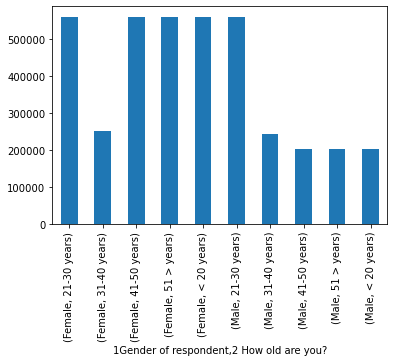

In [23]:
# Understanding some insights from data
plt.figure()
data.groupby(['1Gender of respondent','2 How old are you?']).max().plot(kind='bar',legend=False)

### Observation :

1. In male category age between 21 - 30 years category people mostly purchasing online.

2. In female category only 31 - 40 years is less interested on online.

In [24]:
pd.crosstab(data['24 User friendly Interface of the website'],data['Easy to use website or application'])

Easy to use website or application,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,Paytm.com
24 User friendly Interface of the website,,,,,,,,,,
Agree (4),16,7,0,0,0,22,0,0,0,0
Dis-agree (2),0,0,0,0,0,0,0,0,0,12
Indifferent (3),5,0,0,0,0,0,0,0,0,0
Strongly agree (5),8,19,19,44,64,0,7,20,8,0
Strongly disagree (1),0,18,0,0,0,0,0,0,0,0


#### most of the people preference is Amazon because of rich user interface

### Observation using the above plot :

1. We don't have any target variable in this dataset , So we are assuming consumers most prefered categorish from that we can get to know some information.

2. **Gender Responent** most of the respondent is female and generally it is correct

3. In the age category **20 to 50 years**  highest customer is there.

4. In this dataset most of the customer from north india.**Delhi** is repeating in different name state and city is mixed 

5. In 269 customer almost half of the customer is more than 4 years.

6. Most of the customer using mobile internet

7. Smartphone prepared by consumer or customer.

8. Google chrome browser is mostly used by customer.

9. Most of the customer taking more time to take decision before purchase.

10. Customer preffered for EMI kind payment mode. Buy now pay later policies.

11. Most of the customer using mobile network and Amazon is fast in that.

12. Why did you abandon the “Bag”, “Shopping Cart”? - People waiting of better offer. 